# **Topic :- Suitable Portfolio Prediction through Employee Productivity Analysis**









##### Importing all the necessary libraries and dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,MultiLabelBinarizer,LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

##### Importing the dataset in dataframe

In [ ]:
df_orig = pd.read_csv("/content/employee_dataset.csv")
df = df_orig

In [ ]:
df.head()

,EmployeeID,Name,Age,Gender,Department,Designation,ExperienceYears,Skillset,Salary,ProductivityScore,JoiningDate,WorkLocation,EducationLevel,RemoteWorkEligible,PerformanceRating,LastPromotionYear,ManagerID
0,E07397,Kelly Smith,21.0,Female,Finance,Junior,0.0,"Finance, Excel",26918.0,65.0,2022-12-31,Delhi,Bachelor,No,4.0,2022.0,E08338
1,E05254,Patrick Baker,38.0,Male,Sales,Junior,3.0,"CRM, Negotiation",30960.0,58.0,2022-09-02,Bangalore,Master,No,3.0,2025.0,E06960
2,E05764,Karen Black,37.0,Female,HR,Junior,1.0,"Communication, Recruitment",30858.0,54.0,2019-10-01,Kolkata,Master,No,3.0,2019.0,E05239
3,E10000,Mary Lozano,29.0,Male,IT,Executive,6.0,"SQL, Cloud Computing",43634.0,53.0,2014-05-05,Bangalore,Bachelor,Yes,3.0,2019.0,E01416
4,E09321,Cory Smith,27.0,Female,Finance,Junior,1.0,"Excel, Finance",33096.0,43.0,2022-11-07,Pune,PhD,No,3.0,2022.0,E02520


In [ ]:
df.shape

(8358, 17)

In [ ]:
df.columns

Index(['EmployeeID', 'Name', 'Age', 'Gender', 'Department', 'Designation',
       'ExperienceYears', 'Skillset', 'Salary', 'ProductivityScore',
       'JoiningDate', 'WorkLocation', 'EducationLevel', 'RemoteWorkEligible',
       'PerformanceRating', 'LastPromotionYear', 'ManagerID'],
      dtype='object')

## **Data-preprocessing**



#### Data cleaning

###### Drop column's

In [ ]:
# dropping identifier or non-informative columns like id,name,date for cleaner analysis
df.drop(columns=["ManagerID","JoiningDate","EmployeeID"],inplace=True)
df.shape

(8358, 14)

In [ ]:
# Observing features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8358 entries, 0 to 8357
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                8340 non-null   object 
 1   Age                 8344 non-null   float64
 2   Gender              8337 non-null   object 
 3   Department          8329 non-null   object 
 4   Designation         8340 non-null   object 
 5   ExperienceYears     8339 non-null   float64
 6   Skillset            8338 non-null   object 
 7   Salary              8331 non-null   float64
 8   ProductivityScore   8340 non-null   float64
 9   WorkLocation        8349 non-null   object 
 10  EducationLevel      8343 non-null   object 
 11  RemoteWorkEligible  8342 non-null   object 
 12  PerformanceRating   8337 non-null   float64
 13  LastPromotionYear   8346 non-null   float64
dtypes: float64(6), object(8)
memory usage: 914.3+ KB


In [ ]:
## stastical analysis for all numerical feature
df.describe()

,Age,ExperienceYears,Salary,ProductivityScore,PerformanceRating,LastPromotionYear
count,8344.000000,8339.000000,8331.000000,8340.000000,8337.000000,8346.000000
mean,31.656520,5.347883,52608.213660,66.276379,3.828955,2020.329140
std,6.591427,5.059063,26189.162402,13.413100,0.713027,4.542099
min,21.000000,0.000000,25000.000000,25.000000,2.000000,2010.000000
25%,27.000000,1.000000,32235.500000,57.000000,3.000000,2017.000000
50%,31.000000,4.000000,37922.000000,66.000000,4.000000,2021.000000
75%,36.000000,8.000000,66490.000000,75.000000,4.000000,2025.000000
max,60.000000,30.000000,137180.000000,100.000000,5.000000,2025.000000


###### Drop duplicated row

In [ ]:
# Checking dupicate row in the dataset
df.duplicated().sum()

np.int64(9)

In [ ]:
# Drop all duplicate rows
df.drop_duplicates(inplace=True)

In [ ]:
# Checking dupicate row in the dataset
df.duplicated().sum()

np.int64(0)

Null Value's Removal

In [ ]:
# Checking number of missing values in each column
df.isnull().sum()

,0
Name,18
Age,14
Gender,21
Department,29
Designation,18
ExperienceYears,19
Skillset,20
Salary,27
ProductivityScore,18
WorkLocation,9


In [ ]:
# Splitting columns by datatype
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Define imputers
num_imputer = SimpleImputer(strategy='mean')         # numeric → mean
cat_imputer = SimpleImputer(strategy='most_frequent') # categorical → mode

# Apply imputers to the dataset
df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])


In [ ]:
# Checking number of missing values in each column
df.isnull().sum()

,0
Name,0
Age,0
Gender,0
Department,0
Designation,0
ExperienceYears,0
Skillset,0
Salary,0
ProductivityScore,0
WorkLocation,0


In [ ]:
df.head()

,Name,Age,Gender,Department,Designation,ExperienceYears,Skillset,Salary,ProductivityScore,WorkLocation,EducationLevel,RemoteWorkEligible,PerformanceRating,LastPromotionYear
0,Kelly Smith,21.0,Female,Finance,Junior,0.0,"Finance, Excel",26918.0,65.0,Delhi,Bachelor,No,4.0,2022.0
1,Patrick Baker,38.0,Male,Sales,Junior,3.0,"CRM, Negotiation",30960.0,58.0,Bangalore,Master,No,3.0,2025.0
2,Karen Black,37.0,Female,HR,Junior,1.0,"Communication, Recruitment",30858.0,54.0,Kolkata,Master,No,3.0,2019.0
3,Mary Lozano,29.0,Male,IT,Executive,6.0,"SQL, Cloud Computing",43634.0,53.0,Bangalore,Bachelor,Yes,3.0,2019.0
4,Cory Smith,27.0,Female,Finance,Junior,1.0,"Excel, Finance",33096.0,43.0,Pune,PhD,No,3.0,2022.0


In [ ]:
df[["ProductivityScore","LastPromotionYear","ExperienceYears","Age","PerformanceRating"]] = df[["ProductivityScore","LastPromotionYear","ExperienceYears","Age","PerformanceRating"]].astype(int)

Outlier Detection

In [ ]:
# Selecting only numeric columns from the dataset
num_col = df.select_dtypes(include="number").columns
print(num_col)

Index(['Age', 'ExperienceYears', 'Salary', 'ProductivityScore',
       'PerformanceRating', 'LastPromotionYear'],
      dtype='object')


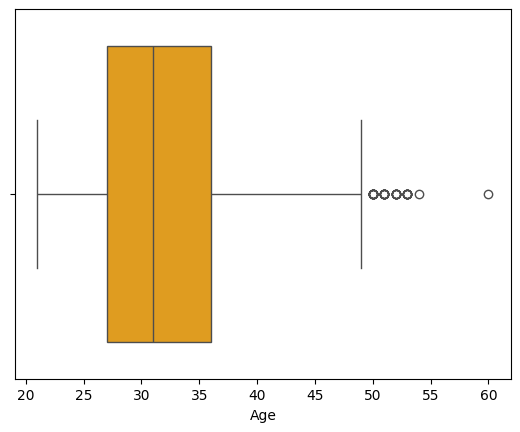

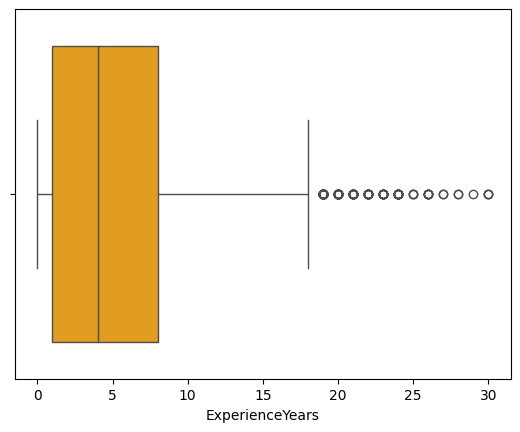

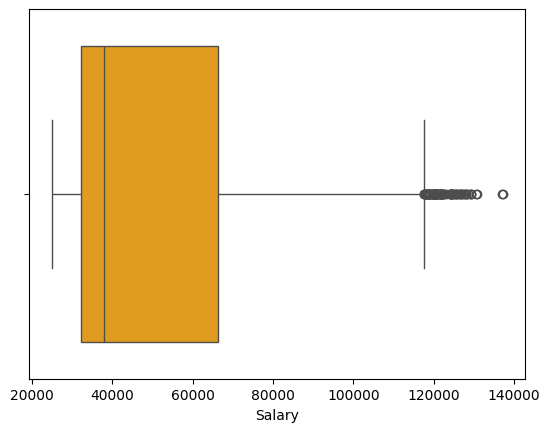

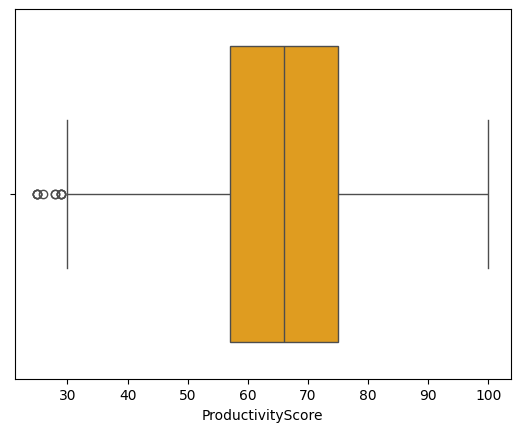

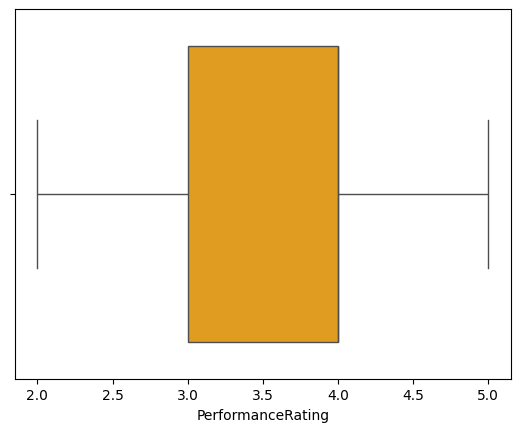

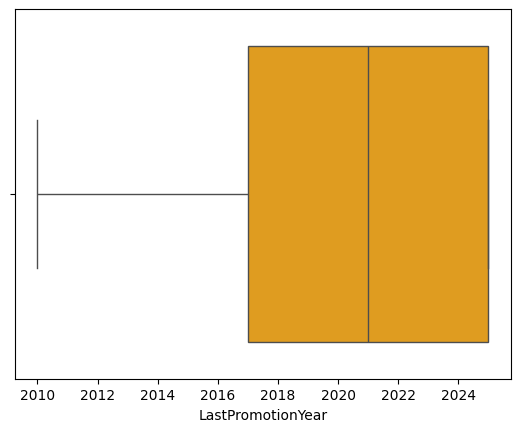

In [ ]:
# Plotting boxplots for all numeric columns
for col in num_col:
    sns.boxplot(x = df[col],color='orange')
    plt.show()

###### The boxplots above show the distribution of the numerical features in the employee dataset : Age, ExperienceYears, Salary, ProductivityScore, PerformanceRating, and LastPromotionYear.



*   Age :- The age distribution is fairly concentrated between the mid-20s and late-30s, with a few employees extending into higher age groups. Some outliers represent unusually young or older employees compared to the majority.

* ExperienceYears :- Majority have under 10 years experience; some highly experienced outliers are present.  

* Salary :- Salary with most employees earning in the lower-to-mid range. A few employees have very high salaries, visible as outliers.

* ProductivityScore :- The scores values lies in the middle, showing that most employees perform within a similar band. However, some lower and higher outliers indicate variations in performance levels.

* PerformanceRating :- Ratings are mostly between 2 to 4 with minimal variation and no major outliers.

* LastPromotionYear: Promotions are recent for most employees, with little significant outliers.









In [ ]:
# Counting outliers in each numeric column using IQR
for col in num_col:
    count = 0
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3-Q1

    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR

    for i in range(df[col].shape[0]):
        if df[col].iloc[i] < lower or df[col].iloc[i] > upper:
            count += 1

    print(f"{col} Outlier Value :",count)

Age Outlier Value : 43
ExperienceYears Outlier Value : 165
Salary Outlier Value : 89
ProductivityScore Outlier Value : 11
PerformanceRating Outlier Value : 0
LastPromotionYear Outlier Value : 0


In [ ]:
# # Removing outliers from all numeric columns at once using IQR
# for col in num_col:
#       # Calculate Q1, Q3, and IQR only for each columns
#     Q1 = df[col].quantile(0.30)
#     Q3 = df[col].quantile(0.70)
#     IQR = Q3 - Q1

#       # Define lower and upper bounds
#     lower = Q1 - 1.5 * IQR
#     upper = Q3 + 1.5 * IQR

#     # Keep only rows where the column value is within the IQR range
#     df = df[(df[col] >= lower) & (df[col] <= upper)]


In [ ]:
# # Plotting boxplots again after outlier removal to verify cleaner distributions
# for col in num_col:
#     sns.boxplot(x = df[col])
#     plt.show()

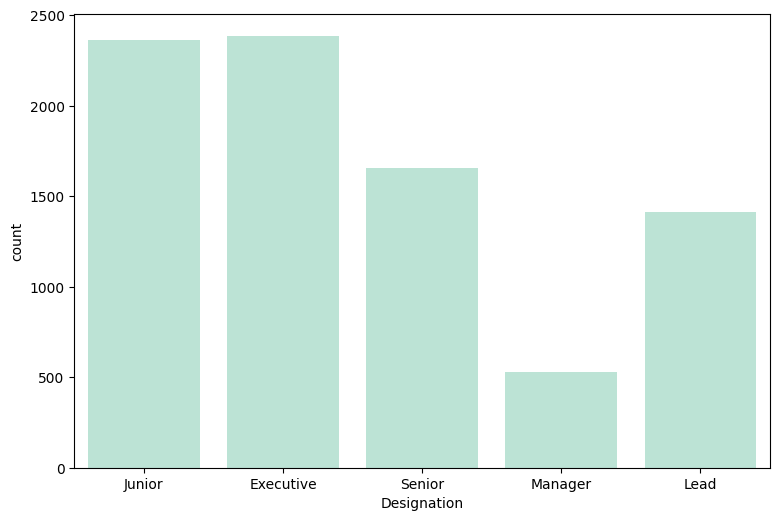

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,2)
sns.countplot(x="Designation", data=df, color="#B5EAD7")

plt.tight_layout()
plt.show()

OLAP Operations

1.ROLL-UP → Aggregate salary by department

In [ ]:
rollup_dept = df.groupby("Department")["Salary"].mean().reset_index()

print("Average salary per department.\n")
print(rollup_dept)


Average salary per department.

   Department        Salary
0     Finance  53496.654173
1          HR  52860.583759
2          IT  52481.341876
3   Marketing  51620.186907
4  Operations  52886.977315
5       Sales  52212.493281


2.DRILL-DOWN → From Department level to individual employee

In [ ]:
print("IT Department employee role and salary:")
print(df[df["Department"] == "IT"][["Name", "Designation", "Salary"]])


IT Department employee role and salary:
                   Name Designation   Salary
3           Mary Lozano   Executive  43634.0
5       Jerome Gonzalez      Junior  38543.0
9           Sarah Scott      Senior  60857.0
12       Rebecca Hughes   Executive  28493.0
14          Paul Fisher      Junior  33063.0
...                 ...         ...      ...
8344  Melinda Jefferson   Executive  31287.0
8347       James Wagner      Junior  35432.0
8354     Vanessa Rogers      Junior  41417.0
8355     Tom Nguyen DDS      Senior  65811.0
8356  Vanessa Henderson   Executive  27231.0

[2971 rows x 3 columns]


3.SLICE → Focus on one dimension (e.g., IT department)

In [ ]:
slice_it = df[df["Department"] == "IT"]
print("IT Department employee Details:\n")
print(slice_it[["Name", "Department", "Designation", "Salary"]])


IT Department employee Details:

                   Name Department Designation   Salary
3           Mary Lozano         IT   Executive  43634.0
5       Jerome Gonzalez         IT      Junior  38543.0
9           Sarah Scott         IT      Senior  60857.0
12       Rebecca Hughes         IT   Executive  28493.0
14          Paul Fisher         IT      Junior  33063.0
...                 ...        ...         ...      ...
8344  Melinda Jefferson         IT   Executive  31287.0
8347       James Wagner         IT      Junior  35432.0
8354     Vanessa Rogers         IT      Junior  41417.0
8355     Tom Nguyen DDS         IT      Senior  65811.0
8356  Vanessa Henderson         IT   Executive  27231.0

[2971 rows x 4 columns]


4.DICE → Filter multiple dimensions (e.g., IT + Finance departments in Delhi)

In [ ]:
dice_it_fin = df[
    (df["Department"].isin(["IT", "Finance"])) &
    (df["WorkLocation"].isin(["Delhi"]))
]
print(dice_it_fin[["Name", "Department", "WorkLocation", "Salary"]])


                      Name Department WorkLocation    Salary
0              Kelly Smith    Finance        Delhi   26918.0
6     Miss Barbara Watkins    Finance        Delhi   62703.0
12          Rebecca Hughes         IT        Delhi   28493.0
17          Matthew Little         IT        Delhi   30276.0
22        Benjamin Bentley         IT        Delhi   31349.0
...                    ...        ...          ...       ...
8300          Amanda Moore         IT        Delhi   26232.0
8303             Lisa Dunn         IT        Delhi   34734.0
8319        Terri Mcdonald         IT        Delhi   35969.0
8340      Michael Robinson         IT        Delhi  106855.0
8350           Andrew Tran    Finance        Delhi   27850.0

[601 rows x 4 columns]


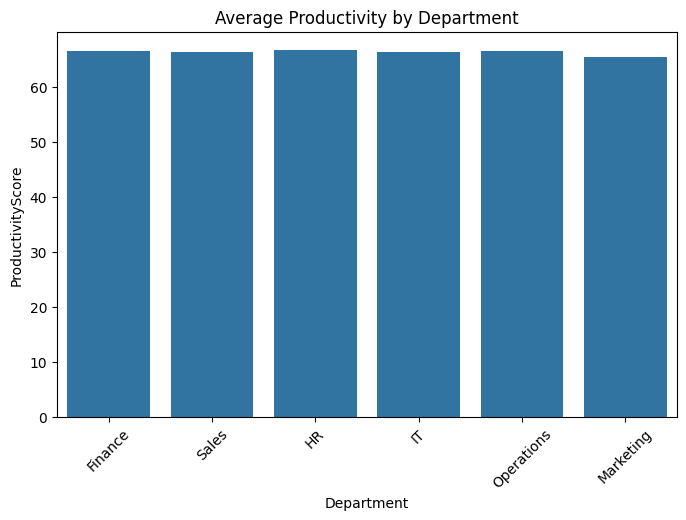

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Average productivity by department
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Department", y="ProductivityScore", ci=None)
plt.title("Average Productivity by Department")
plt.xticks(rotation=45)
plt.show()


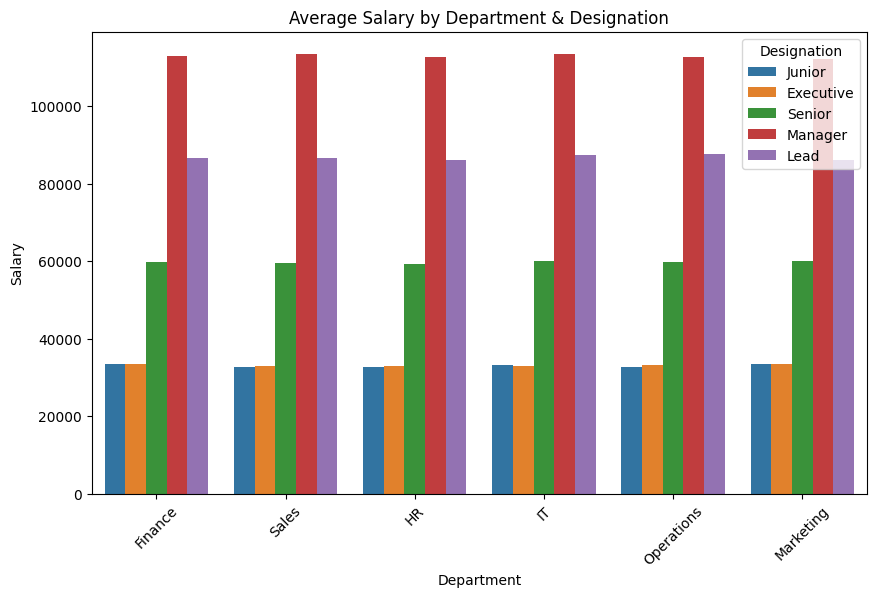

In [ ]:
# Salary by Department and Designation
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="Department", y="Salary", hue="Designation", ci=None)
plt.title("Average Salary by Department & Designation")
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.drop(columns=['Name'],inplace=True)

**Encoding**

In [ ]:
# Checking unique categories in selected categorical columns
col_value = ['Gender', 'Department', 'Designation', 'WorkLocation','EducationLevel', 'RemoteWorkEligible']

for col in col_value:
    print(f"{col} : ",df[col].unique())

Gender :  ['Female' 'Male']
Department :  ['Finance' 'Sales' 'HR' 'IT' 'Operations' 'Marketing']
Designation :  ['Junior' 'Executive' 'Senior' 'Manager' 'Lead']
WorkLocation :  ['Delhi' 'Bangalore' 'Kolkata' 'Pune' 'Hyderabad' 'Noida' 'Mumbai'
 'Chennai']
EducationLevel :  ['Bachelor' 'Master' 'PhD' 'High School']
RemoteWorkEligible :  ['No' 'Yes']


In [ ]:
# # Converting categorical values in 'Gender' into numeric (e.g., Male=1, Female=0)
# la = LabelEncoder()
# df['Gender'] = la.fit_transform(df['Gender'])
# # Encode RemoteWorkEligible into binary (Yes=1, No=0)
# df['RemoteWorkEligible'] = la.fit_transform(df['RemoteWorkEligible'])
df["Gender"] = df["Gender"].str.strip().str.lower().map({"male": 1,"female": 0})
df["RemoteWorkEligible"] = df["RemoteWorkEligible"].str.strip().str.lower().map({"yes": 1,"no": 0})

In [ ]:
# Apply Ordinal Encoding based on defined order
Des_cat = ['Junior', 'Executive', 'Lead', 'Senior', 'Manager']
Edu_cat = ['High School', 'Bachelor', 'Master', 'PhD']

oe = OrdinalEncoder(categories=[Des_cat,Edu_cat])

df[["Designation","EducationLevel"]] = oe.fit_transform(df[["Designation","EducationLevel"]])

df[["Designation","EducationLevel"]] = df[["Designation","EducationLevel"]].astype(int)

In [ ]:
oh = OneHotEncoder(drop="first", sparse_output=False, dtype=np.int64)

encoded = oh.fit_transform(df[["WorkLocation", "Department"]])

encoded_df = pd.DataFrame(encoded, columns = oh.get_feature_names_out(["WorkLocation", "Department"]))

df = pd.concat([df.drop(["WorkLocation", "Department"], axis=1).reset_index(drop=True),
                encoded_df.reset_index(drop=True)], axis=1)

In [ ]:
df['Skillset_list'] = df['Skillset'].str.split(', ')
df.head()

,Age,Gender,Designation,ExperienceYears,Skillset,Salary,ProductivityScore,EducationLevel,RemoteWorkEligible,PerformanceRating,...,WorkLocation_Kolkata,WorkLocation_Mumbai,WorkLocation_Noida,WorkLocation_Pune,Department_HR,Department_IT,Department_Marketing,Department_Operations,Department_Sales,Skillset_list
0,21,0,0,0,"Finance, Excel",26918.0,65,1,0,4,...,0,0,0,0,0,0,0,0,0,"[Finance, Excel]"
1,38,1,0,3,"CRM, Negotiation",30960.0,58,2,0,3,...,0,0,0,0,0,0,0,0,1,"[CRM, Negotiation]"
2,37,0,0,1,"Communication, Recruitment",30858.0,54,2,0,3,...,1,0,0,0,1,0,0,0,0,"[Communication, Recruitment]"
3,29,1,1,6,"SQL, Cloud Computing",43634.0,53,1,1,3,...,0,0,0,0,0,1,0,0,0,"[SQL, Cloud Computing]"
4,27,0,0,1,"Excel, Finance",33096.0,43,3,0,3,...,0,0,0,1,0,0,0,0,0,"[Excel, Finance]"


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import ast

data = df['Skillset_list'].copy()

if isinstance(data.iloc[0], str):
    data = data.apply(ast.literal_eval)

te = TransactionEncoder()
te_ary = te.fit(data).transform(data)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

print("Encoded Skillset DataFrame:")
print(df_encoded.head())

frequent_itemsets = apriori(df_encoded, min_support=0.02, use_colnames=True)
print("\n Frequent Skill Combinations:")
print(frequent_itemsets)


rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print("\n Association Rules (Skill Relationships):")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Encoded Skillset DataFrame:
   Accounting  Analytics    C++    CRM  Cloud Computing  Communication  \
0       False      False  False  False            False          False   
1       False      False  False   True            False          False   
2       False      False  False  False            False           True   
3       False      False  False  False             True          False   
4       False      False  False  False            False          False   

   Conflict Management  Content Creation  Data Analysis  Excel  Finance  \
0                False             False          False   True     True   
1                False             False          False  False    False   
2                False             False          False  False    False   
3                False             False          False  False    False   
4                False             False          False   True     True   

    Java  Logistics  Marketing  Negotiation  Project Management  Python  \
0

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
mlb = MultiLabelBinarizer()

skill_encoded = mlb.fit_transform(df['Skillset_list'])

skill_df = pd.DataFrame(skill_encoded, columns=mlb.classes_)

# skill_df.head()
df = pd.concat([df, skill_df], axis=1)

df.drop(columns="Skillset_list", inplace=True)
df.drop(columns="Skillset",inplace=True)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
skill_df.shape

(8349, 20)

In [ ]:
df.sample(10)
#Randomly selects 10 rows from the DataFrame df and displays them

,Age,Gender,Designation,ExperienceYears,Salary,ProductivityScore,EducationLevel,RemoteWorkEligible,PerformanceRating,LastPromotionYear,...,Finance,Java,Logistics,Marketing,Negotiation,Project Management,Python,Recruitment,SEO,SQL
1371,32,1,0,2,29791.0,53,1,0,3,2014,...,0,0,0,0,1,0,0,0,0,0
2244,21,1,0,0,31194.0,65,0,0,4,2012,...,1,0,0,0,0,0,0,0,0,0
3580,30,1,1,1,28213.0,67,2,1,4,2025,...,0,1,0,0,0,0,0,0,0,0
2248,25,0,1,1,35124.0,52,1,0,3,2024,...,0,0,1,0,0,0,0,0,0,0
4681,39,1,1,4,40350.0,90,2,0,5,2015,...,0,0,0,0,0,0,0,0,0,0
7742,37,1,2,15,95945.0,100,1,1,5,2025,...,0,0,0,0,0,0,1,0,0,0
5560,23,1,1,1,34273.0,47,2,1,3,2016,...,0,0,0,0,0,0,0,0,0,0
3605,35,1,3,8,63307.0,72,2,1,4,2021,...,0,0,0,0,0,0,0,0,0,0
5989,21,0,0,0,28056.0,50,1,1,3,2015,...,0,0,0,0,0,0,0,0,0,1
3872,31,1,0,5,40314.0,62,1,0,4,2024,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(8349, 42)

In [ ]:
df.sample(10)
#Randomly selects 10 rows from the DataFrame df and displays them

,Age,Gender,Designation,ExperienceYears,Salary,ProductivityScore,EducationLevel,RemoteWorkEligible,PerformanceRating,LastPromotionYear,...,Finance,Java,Logistics,Marketing,Negotiation,Project Management,Python,Recruitment,SEO,SQL
3711,30,1,3,9,68361.0,65,2,1,4,2021,...,0,0,0,0,0,0,1,0,0,0
1759,22,1,1,0,25974.0,75,1,1,4,2022,...,0,0,0,0,0,0,0,0,0,0
2694,23,0,1,1,30336.0,73,1,1,4,2021,...,0,0,0,0,0,0,0,0,0,0
5494,22,1,1,1,36437.0,66,1,0,4,2012,...,0,0,0,1,0,0,0,0,0,0
8329,40,1,0,2,34223.0,61,2,0,4,2024,...,0,0,0,0,0,0,0,0,0,0
37,47,1,2,26,113322.0,69,2,1,4,2025,...,0,0,0,1,0,0,0,0,0,0
897,21,1,1,0,25323.0,55,1,0,3,2015,...,0,0,0,1,0,0,0,0,0,0
3689,27,1,1,6,43454.0,46,1,0,3,2016,...,0,0,0,0,0,0,0,0,0,0
6520,24,1,1,0,30758.0,51,1,0,3,2013,...,0,0,0,1,1,0,0,0,0,0
4335,40,0,3,8,63500.0,79,1,0,4,2020,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(8349, 42)

# **Classification : Suggest suitable roles or Designation**

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Keep X_classi as the original DataFrame
X_classi_df = df.drop(columns=["Designation"])
y_classi = df["Designation"]

selector = SelectKBest(score_func=f_classif, k=3)
X_new = selector.fit_transform(X_classi_df, y_classi)

# Get top 3 feature names using the original DataFrame
top_3_features = X_classi_df.columns[selector.get_support()].tolist()
print("Top 3 selected features using f_classif:", top_3_features)

Top 3 selected features using f_classif: ['ExperienceYears', 'Salary', 'ProductivityScore']


In [ ]:
# Taking the top 3 features
X = df[['Salary','ExperienceYears','ProductivityScore']]
Y = df["Designation"]

# Train_Test Splitting
X_train,X_test,Y_train,Y_test = train_test_split(X_classi_df,y_classi,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

1-A ) Decision Tree

Decision Tree Training Accuracy: 1.0
Decision Tree Testing Accuracy: 0.7023952095808383

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.48      0.47      0.47       472
           1       0.49      0.50      0.50       487
           2       1.00      1.00      1.00       269
           3       1.00      0.99      0.99       332
           4       0.99      1.00      1.00       110

    accuracy                           0.70      1670
   macro avg       0.79      0.79      0.79      1670
weighted avg       0.70      0.70      0.70      1670



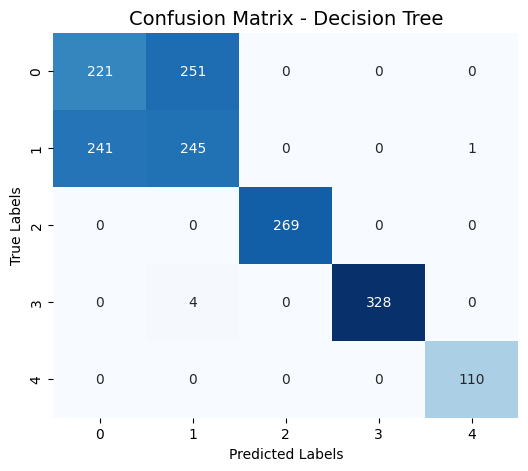

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix


# Train Decision Tree
dt = DecisionTreeClassifier(criterion='entropy',random_state=42)
dt.fit(X_train, Y_train)

Y_train_pred_dt1 = dt.predict(X_train)
Y_test_pred_dt1 = dt.predict(X_test)

# Accuracy
train_acc_dt1 = accuracy_score(Y_train, Y_train_pred_dt1)
test_acc_dt1 = accuracy_score(Y_test, Y_test_pred_dt1)

print(f"Decision Tree Training Accuracy: {train_acc_dt1}")
print(f"Decision Tree Testing Accuracy: {test_acc_dt1}\n")

# Classification report for test set
print("Classification Report (Test Set):")
print(classification_report(Y_test, Y_test_pred_dt1))

# Confusion Matrix
cm = confusion_matrix(Y_test,Y_test_pred_dt1)

# Display confusion matrix as heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title("Confusion Matrix - Decision Tree", fontsize=14)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

1) Training Accuracy ~ 99.94% - The model learned almost perfectly on the training data.
Testing Accuracy ~ 70.89% - Performance on unseen data is significantly lower.
This is a classic case of **overfitting**.

2) **Classes 0 & 1:** Poor precision and recall; the model struggles, likely due to overlap or being majority classes.
**Classes 2, 3 & 4:** Excellent performance;**Macro vs Weighted Avg:** Macro avg (0.80) shows average per-class performance, while weighted avg (0.71) drops because poor performance on the majority classes 0 & 1 lowers overall accuracy.

**1-B) Decision Tree (Hyperparametr tunning)**

Best Parameters: {'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 10}
Decision Tree Training Accuracy: 0.7794580026950142
Decision Tree Testing Accuracy: 0.7245508982035929

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.51      0.52      0.52       472
           1       0.53      0.52      0.52       487
           2       1.00      1.00      1.00       269
           3       1.00      1.00      1.00       332
           4       0.99      1.00      1.00       110

    accuracy                           0.72      1670
   macro avg       0.81      0.81      0.81      1670
weighted avg       0.72      0.72      0.72      1670



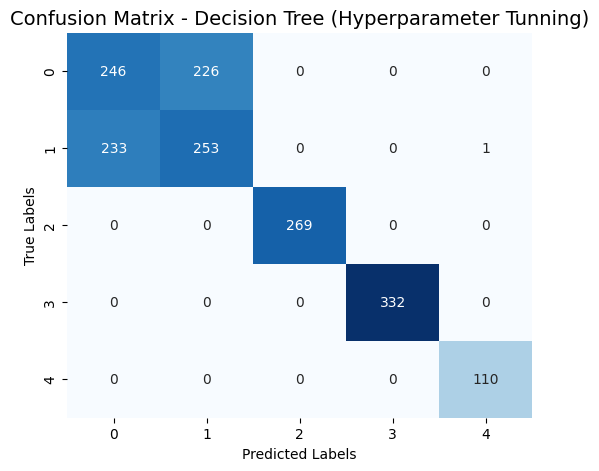

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid
params = {
    'max_depth': [3, 5, 7, 10, 12],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search with 5-fold CV
grid_dt = GridSearchCV(DecisionTreeClassifier(criterion='entropy', class_weight='balanced'), param_grid=params, cv=5, scoring='accuracy')
grid_dt.fit(X_train, Y_train)

print("Best Parameters:", grid_dt.best_params_)

# Predictions
Y_train_pred_dt2 = grid_dt.predict(X_train)
Y_test_pred_dt2 = grid_dt.predict(X_test)

train_acc_dt2 = accuracy_score(Y_train, Y_train_pred_dt2)
test_acc_dt2 = accuracy_score(Y_test, Y_test_pred_dt2)

# Accuracy
print(f"Decision Tree Training Accuracy: {train_acc_dt2}")
print(f"Decision Tree Testing Accuracy: {test_acc_dt2}\n")

# Classification report
print("Classification Report (Test Set):")
print(classification_report(Y_test, Y_test_pred_dt2))

# Confusion Matrix
cm = confusion_matrix(Y_test,Y_test_pred_dt2 )

# Display confusion matrix as heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title("Confusion Matrix - Decision Tree (Hyperparameter Tunning)", fontsize=14)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

1) **Training vs Testing Accuracy:** 77.68% vs 72.76% - slight overfitting, better than untuned tree.

2) **Classes 0 & 1:** Low precision/recall → struggles with majority/overlapping classes.
**Classes 2, 3 & 4:** Near-perfect predictions → easier to separate or smaller classes.
**Macro avg (80%) vs Weighted avg (72%): **Majority classes lower weighted accuracy.

**2) k-nearest neighbor**

In [ ]:
# Taking the top 3 features
X = df[['Salary','Age','ProductivityScore']]
Y = df["Designation"]

# Train_Test Splitting
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

KNN Training Accuracy: 0.7987722712980985
KNN Testing Accuracy: 0.7335329341317365

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.53      0.56      0.55       472
           1       0.55      0.53      0.54       487
           2       1.00      0.98      0.99       269
           3       1.00      0.99      1.00       332
           4       0.95      1.00      0.97       110

    accuracy                           0.73      1670
   macro avg       0.81      0.81      0.81      1670
weighted avg       0.73      0.73      0.73      1670



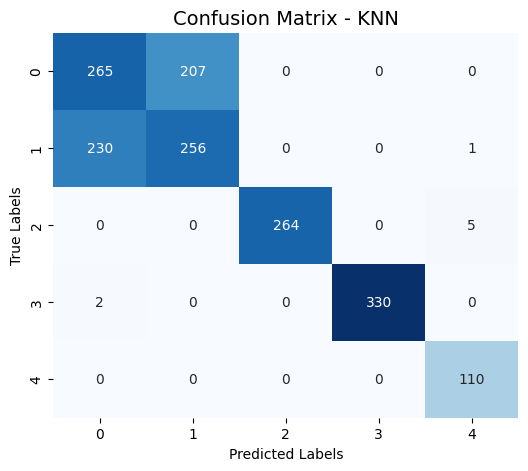

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


# Train KNN Model
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)

Y_train_pred_dt1 = knn.predict(X_train)
Y_test_pred_dt1 = knn.predict(X_test)

# Accuracy
train_acc_dt1 = accuracy_score(Y_train, Y_train_pred_dt1)
test_acc_dt1 = accuracy_score(Y_test, Y_test_pred_dt1)

print(f"KNN Training Accuracy: {train_acc_dt1}")
print(f"KNN Testing Accuracy: {test_acc_dt1}\n")

# Classification report for test set
print("Classification Report (Test Set):")
print(classification_report(Y_test, Y_test_pred_dt1))

# Confusion Matrix
cm = confusion_matrix(Y_test,Y_test_pred_dt1)

# Display confusion matrix as heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title("Confusion Matrix - KNN", fontsize=14)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
import pickle

# Save model to your Drive
pickle.dump(knn, open('/content/drive/MyDrive/knn_model.pkl', 'wb'))

# **Clustering**

## 1.K-means clustering

In [ ]:
clu = df[['Age', 'Salary', 'ProductivityScore']]
clu.isna().sum()

,0
Age,0
Salary,0
ProductivityScore,0


In [ ]:
import plotly.express as px
fig = px.scatter_3d(clu, x='Age', y='Salary', z='ProductivityScore')
fig.show()

In [ ]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
  km = KMeans(n_clusters=i)
  km.fit_predict(clu)
  wcss.append(km.inertia_)

print(wcss)

[5706557900798.009, 1320714847084.5408, 455421417641.2637, 176850362844.92255, 148046363338.8779, 95989240521.66008, 86675981972.39822, 57914059974.64087, 52245765616.58741, 40402837575.07073]


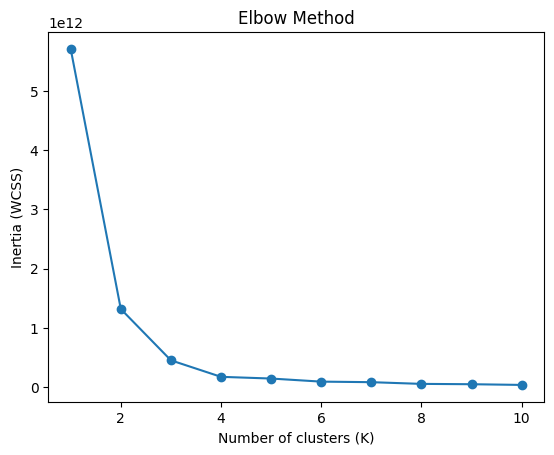

In [ ]:
plt.plot(range(1,11),wcss,marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method")

plt.show()

In [ ]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(clu)
y_predicted

array([1, 1, 1, ..., 2, 1, 3], dtype=int32)

In [ ]:
new_df = pd.DataFrame()
clu = df[['Age', 'Salary', 'ProductivityScore']]
new_df['Age'] = clu['Age']
new_df['Salary'] = clu['Salary']
new_df['ProductivityScore'] = clu['ProductivityScore']
new_df['labels'] = y_predicted
new_df.head()

,Age,Salary,ProductivityScore,labels
0,21,26918.0,65,1
1,38,30960.0,58,1
2,37,30858.0,54,1
3,29,43634.0,53,1
4,27,33096.0,43,1


In [ ]:
fig = px.scatter_3d(new_df, x='Age', y='Salary', z='ProductivityScore', color='labels')
fig.show()

Label 0 -> 100k-130k (Manager's)

Label 1 -> 25k-40k (Junior & Executive)

Label 2 -> 50k-70k (Senior)

Label 3 -> 70k-100k (Lead)

## **2.hierarchical clustering**

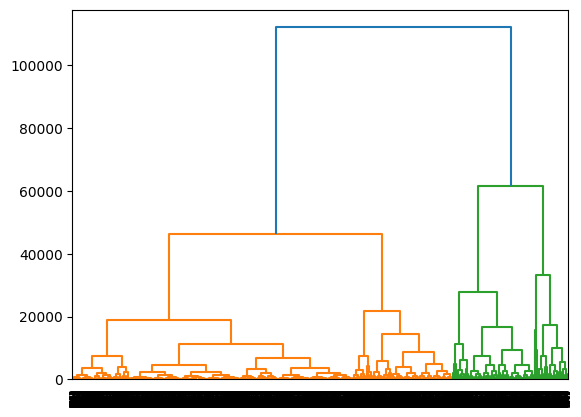

In [ ]:
import scipy.cluster.hierarchy as shc
dend = shc.dendrogram(shc.linkage(clu, method='complete'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, linkage='complete')
labels_=cluster.fit_predict(clu)

In [ ]:
fig = px.scatter_3d(x=clu['Age'], y=clu['Salary'], z=clu['ProductivityScore'], color=labels_)
fig.show()

## Evaluation

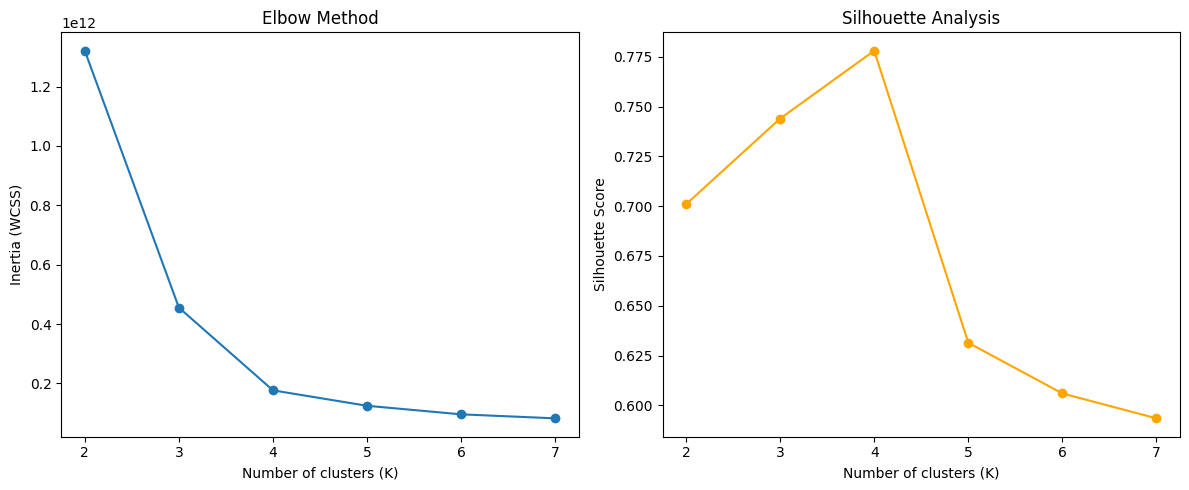

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertias = []
sil_scores = []
K_range = range(2, 8)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(clu)

    inertias.append(kmeans.inertia_)

    sil_scores.append(silhouette_score(clu, labels))


fig,axes = plt.subplots(1,2,figsize=(12,5))

# Plot Inertia (Elbow method)
axes[0].plot(K_range, inertias, marker='o')
axes[0].set_xlabel("Number of clusters (K)")
axes[0].set_ylabel("Inertia (WCSS)")
axes[0].set_title("Elbow Method")

# Plot Silhouette Scores
axes[1].plot(K_range, sil_scores, marker='o', color='orange')
axes[1].set_xlabel("Number of clusters (K)")
axes[1].set_ylabel("Silhouette Score")
axes[1].set_title("Silhouette Analysis") # should be above 0.6

plt.tight_layout()
plt.show()


In [ ]:
import pickle

# Load model from Drive
knn = pickle.load(open('/content/drive/MyDrive/knn_model.pkl', 'rb'))

In [ ]:
import gradio as gr

Des_cat = ['Junior', 'Executive', 'Lead', 'Senior', 'Manager']

def predict_designation(salary, age, productivity_score):
    input_data = [[salary, age, productivity_score]]
    prediction = knn.predict(input_data)[0]
    designation = Des_cat[int(prediction)]
    return designation

interface = gr.Interface(
    fn=predict_designation,
    inputs=[
        gr.Number(label="Salary"),
        gr.Number(label="Age"),
        gr.Number(label="Productivity Score")
    ],
    outputs=gr.Textbox(label="Predicted Designation"),
    title="Employee Designation Predictor",
    description="Enter Salary, Age, and Productivity Score to predict an employee's designation using KNN."
)

interface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b587d68f23bac99cd9.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
